## Steerable Polarisation

The idea is to treat the linear polarisation vector in the complex plane, $P = Q + iU$, with complex steerable wavelets.

The following example use the $\rho$ ophiuchus region from Planck 353 GHz map.

In [2]:
!inline=1

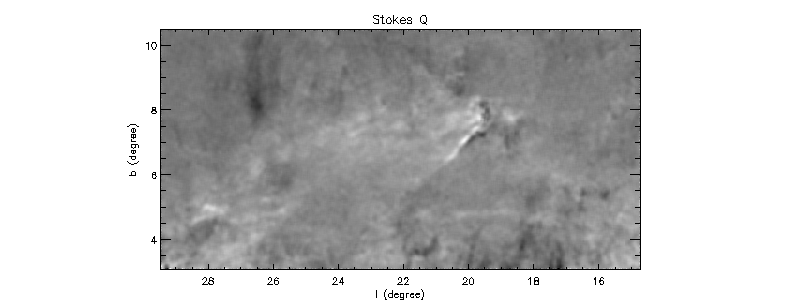

In [14]:
Q=readfits('/user/workdir/robitaij/fil2star/Planck/HFI_Q_ophiuchus.fits',hdQ)
U=readfits('/user/workdir/robitaij/fil2star/Planck/HFI_U_ophiuchus.fits',hdU)

;Smooth map to increase signal to noise
;Qsm = smooth(Q,10)
;Rebin map
N = size(Q)
Qrb = congrid(Q, 512, 256)
Qrb = smooth(Qrb,5)

window,xsize=800,ysize=300
imaffi,Qrb,title='Stokes Q'

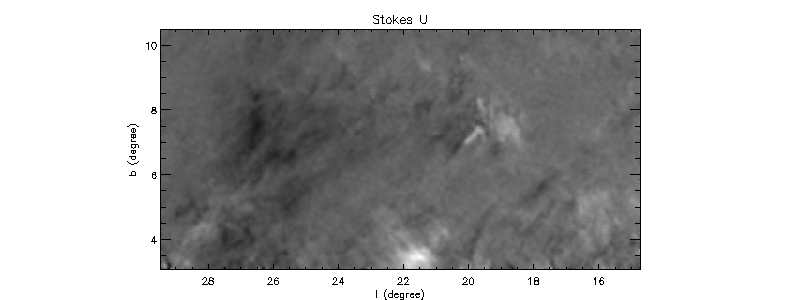

In [15]:
;Usm = smooth(U,10)
Urb = congrid(U, 512, 256)
Urb = smooth(Urb,5)

window,xsize=800,ysize=300
imaffi,Urb,title='Stokes U'

Smooth Stokes maps to increase signal to noise and compute the *Line integral convolution* image.

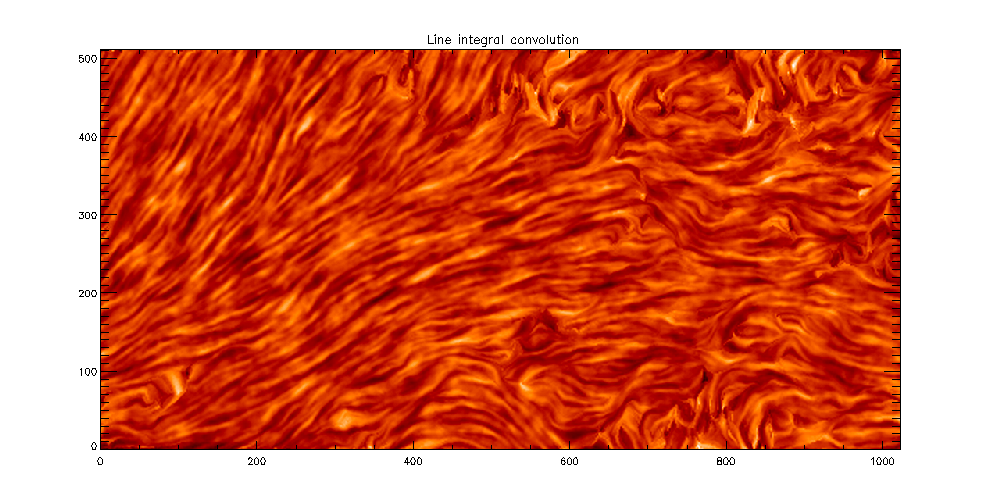

% Program caused arithmetic error: Floating underflow


In [25]:
pro QUatan2,q,u,qc=qc,uc=uc

mag = sqrt(q^2.+u^2.)
angl = 0.5*atan2(-u,q)

qc = mag*cos(angl)
uc = mag*sin(angl)

END

N = size(Q)

;Gaussian random noise for the texture
;fbm=bytscl(fbm2d(-1.2,512,256))
t = randomu(seed, 512, 256)
smooth,t,smooth=t,sigma=1.2

QUatan2,Qrb,Urb,qc=qc,uc=uc

flow = congrid(mg_lic(qc, uc,texture=bytscl(t)),1024,512,cubic=-1,/interp)

mamdct,3
window,xsize=1000,ysize=500
imaffi,flow,title=' Line integral convolution'

As in the case of the gradient of the linear polarisation, do these structures represent only the magnetic field fluctuations at the smallest spatial scale only?

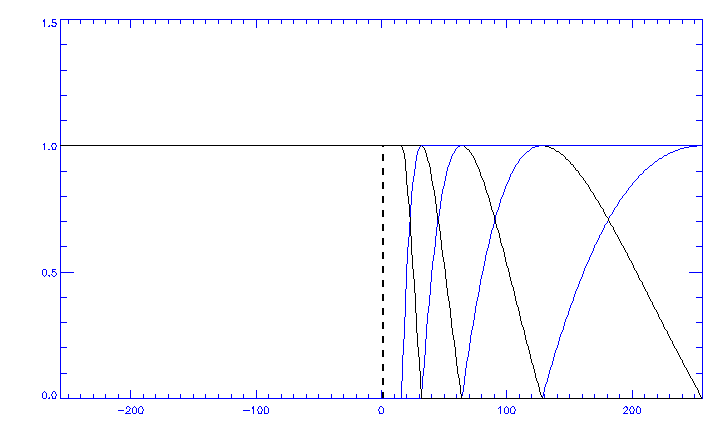

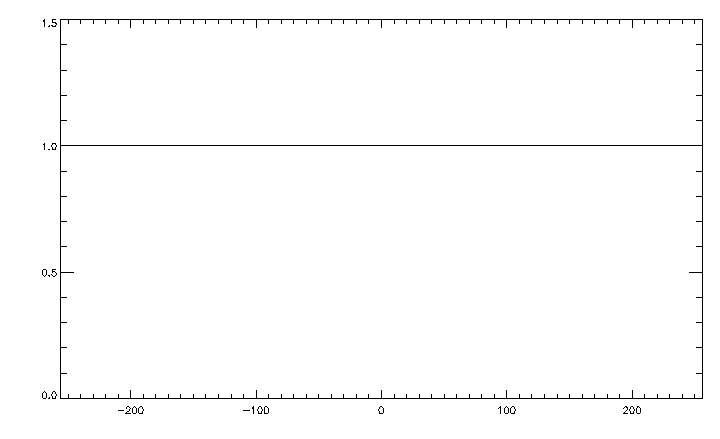

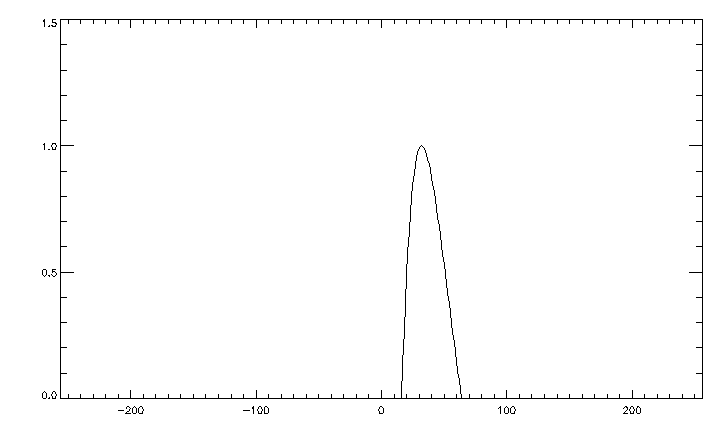

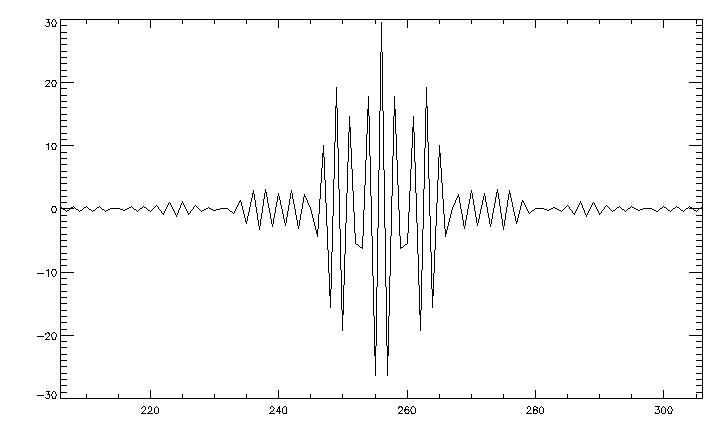

     128
      64
      32


In [10]:
window,0
steerable